In [35]:
!kaggle competitions download -c kuzushiji-recognition -p raw

!unzip -n -q raw/train.csv.zip -d data
!chmod 444 data/train.csv 
!unzip -n -q raw/train_images.zip -d data/train_images
!unzip -n -q raw/test_images.zip -d data/test_images

!cp -f raw/unicode_translation.csv data/

unicode_translation.csv: Skipping, found more recently modified local copy (use --force to force download)
sample_submission.csv: Skipping, found more recently modified local copy (use --force to force download)
train.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
test_images.zip: Skipping, found more recently modified local copy (use --force to force download)
train_images.zip: Skipping, found more recently modified local copy (use --force to force download)


In [34]:
!pip install wget
!wget -nd -q --show-progress https://noto-website-2.storage.googleapis.com/pkgs/NotoSansCJKjp-hinted.zip -P raw
!unzip -n -q raw/NotoSansCJKjp-hinted.zip -d assets

NotoSansCJKjp-hinte 100%[===================>] 115.49M  24.6MB/s    in 5.1s    


In [1]:
import numpy as np
import pandas as pd

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import matplotlib.font_manager as font_manager
import cv2

import re
import csv

In [2]:
input_dir = 'data'

font_path = 'assets/NotoSansCJKjp-Regular.otf'
prop = font_manager.FontProperties(fname=font_path)

In [3]:
df = pd.read_csv(input_dir + '/train.csv')
df['chars'] = df.labels.str.findall(r"[\w\+]{6}[\s\d]*\d")
df.head()

,image_id,labels,chars
0,100241706_00004_2,U+306F 1231 3465 133 53 U+304C 275 1652 84 69 ...,"[U+306F 1231 3465 133 53, U+304C 275 1652 84 6..."
1,100241706_00005_1,U+306F 1087 2018 103 65 U+304B 1456 1832 40 73...,"[U+306F 1087 2018 103 65, U+304B 1456 1832 40 ..."
2,100241706_00005_2,U+306F 572 1376 125 57 U+306E 1551 2080 69 68 ...,"[U+306F 572 1376 125 57, U+306E 1551 2080 69 6..."
3,100241706_00006_1,U+3082 1455 3009 65 44 U+516B 1654 1528 141 75...,"[U+3082 1455 3009 65 44, U+516B 1654 1528 141 ..."
4,100241706_00007_2,U+309D 1201 2949 27 33 U+309D 1196 1539 27 36 ...,"[U+309D 1201 2949 27 33, U+309D 1196 1539 27 3..."


In [4]:
with open('data/unicode_translation.csv') as f:
    reader = csv.reader(f)
    next(reader) # skip header
    unicode = dict(reader)

In [5]:
def id_to_path(input_id, dir_type='train'):
    path = input_dir + '/' + dir_type + '_images/' + input_id
    if '.jpg' not in path:
        path = path + '.jpg'
    return path

def label_explode(l):
    codename, x, y, w, h = str.split(l)
    char = unicode[codename]
    x, y, w, h = int(x), int(y), int(w), int(h)
    
    return char, x, y, w, h

def print_labels(ax, l):
    char, x, y, w, h = label_explode(l)
    rect = Rectangle((x, y), w, h, linewidth=1, edgecolor="g", facecolor="none")
    ax.add_patch(rect)
    
    x_text = x + w + 10
    y_text = y + (h/2)
    ax.text(x_text, y_text, char, fontproperties=prop, color='g', size=24)
    
    return ax

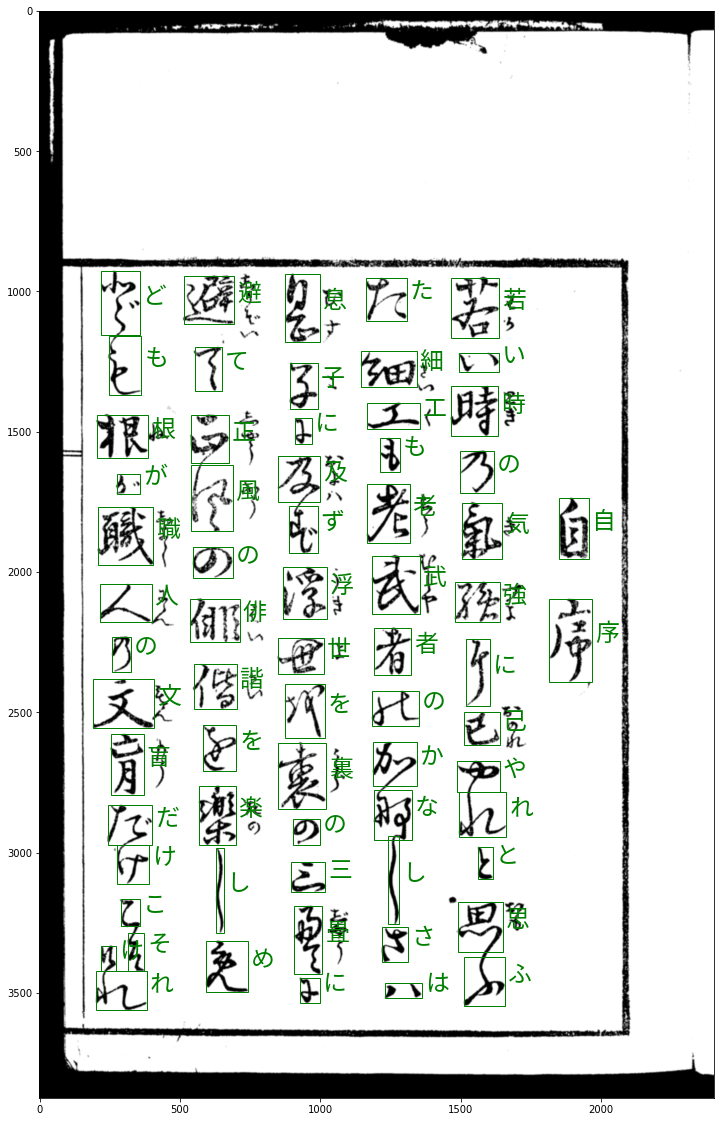

In [13]:
test_id = df.loc[0, 'image_id']
test_labels = df.loc[0, 'chars']

fig, ax = plt.subplots(figsize=(20,20))
img = cv2.imread(id_to_path(test_id), cv2.IMREAD_GRAYSCALE)
(thresh, img_bw) = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
imgplot = plt.imshow(img_bw, cmap='gray', interpolation='bicubic')

for l in test_labels:
    print_labels(ax, l)

は 1231 3465 133 53


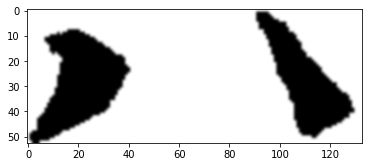

In [18]:
test_label = test_labels[0]
char, x, y, w, h = label_explode(test_label)

print(char, x, y, w, h)

plt.imshow(img_bw[y:y+h, x:x+w], cmap='gray', interpolation='bicubic')